In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates



# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper

import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite

engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model

Base = automap_base()

# reflect the tables

Base.prepare(engine)

In [7]:
# View all of the classes that automap found

Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table

Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB

session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.

most_recent_date = session.query(func.max(Measurement.date)).first()
most_recent_date

('2017-08-23',)

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.

previous_year = dt.date(2017,8,23) - dt.timedelta(days = 365)

# Perform a query to retrieve the data and precipitation scores

results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= previous_year).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names

df = pd.DataFrame(results, columns = ("date","precipitation"))

# Sort the dataframe by date

df = df.sort_values("date")

Text(0.0, 1.0, 'Daily Precipitation in Hawaii')

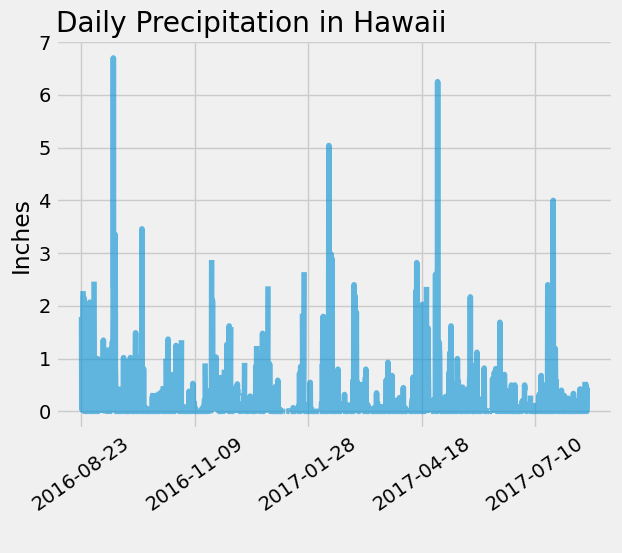

In [12]:
df.plot(x = "date", y = "precipitation", rot = 35, alpha = .6, legend = False)
plt.xlabel(" ")
plt.ylabel("Inches")
plt.title("Daily Precipitation in Hawaii", loc = "left")


In [13]:
# Use Pandas to calculate the summary statistics for the precipitation data

df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


## Use matplotlib

In [24]:
df_series = df.groupby(by = "date").mean()
df_series

,precipitation
date,
2016-08-23,0.451667
2016-08-24,1.555000
2016-08-25,0.077143
2016-08-26,0.016667
2016-08-27,0.064000
...,...
2017-08-19,0.030000
2017-08-20,0.005000
2017-08-21,0.193333


In [37]:
df_series

,precipitation
date,
2016-08-23,0.451667
2016-08-24,1.555000
2016-08-25,0.077143
2016-08-26,0.016667
2016-08-27,0.064000
...,...
2017-08-19,0.030000
2017-08-20,0.005000
2017-08-21,0.193333


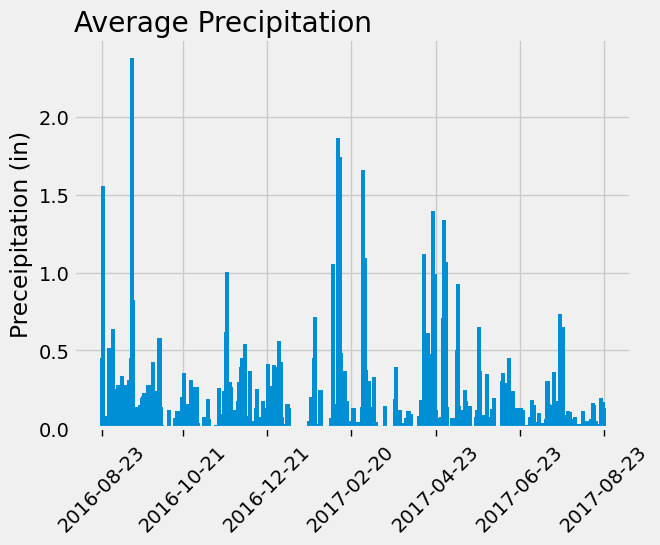

In [43]:

# Use Pandas Plotting with Matplotlib to plot the data

figure1, axes1 = plt.subplots()

axes1.bar(df_series.index,
          list(df_series["precipitation"]),
          width =  3)

plt.xticks(df_series.index,rotation = 45)
plt.title("Average Precipitation",loc = "left")
plt.ylabel("Preceipitation (in)")

axes1.set_xticks(df_series.index)

axes1.xaxis.set_major_locator(mdates.MonthLocator(bymonth = range(1,12, 2)))
axes1.tick_params(axis='x', which='major', width = 1, length = 6)

#axes1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))






# Exploratory Station Analysis

In [96]:
# Design a query to calculate the total number of stations in the dataset

session.query(func.count(Station.station)).all()

[(9,)]

In [98]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [100]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 4.183333333333314, 'Temperature ($\\degree $F)')

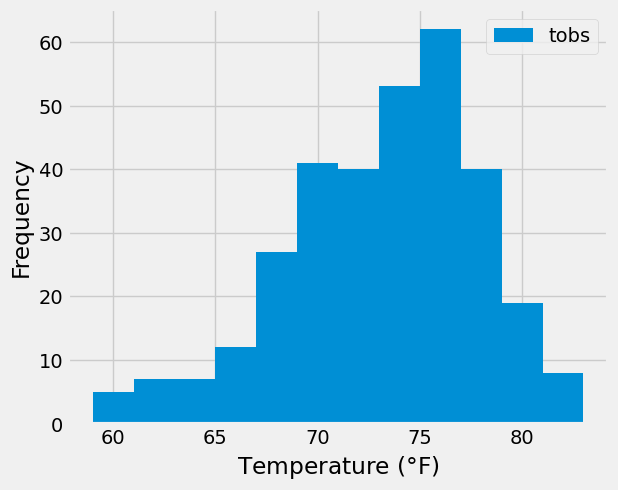

In [109]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

import datetime as dt
from pandas.plotting import table

previous_year = dt.date(2017,9,23) - dt.timedelta(days = 365)

results = session.query(Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date >= previous_year).all()

df = pd.DataFrame(results, columns = ['tobs'])

df.plot.hist(bins = 12)
plt.tight_layout()
plt.xlabel("Temperature ($\degree $F)")

# Close Session

In [110]:
# Close Session
session.close()